ვაიმპორტებთ საჭირო ბიბლიოთეკებს


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from collections import Counter
import xlsxwriter

შემოგვყავს მონაცემები

In [2]:
df = pd.read_excel("C:/Users/User/Desktop/Analysis-of-Georgian-Data/Vehicles-Statistic-Georgia/Data/Import Data/იმპორტი_2018.xlsx") 


ვწერთ რადენი სვეტი და რამდენი სტრიქონი გვინდა რო შანდეს ხოლმე

In [3]:
pd.set_option('display.max_columns', None)   # number of Colums
pd.set_option('display.max_rows', 18)   # number of Rows

                                        მომავალში საქმის გასამარტივებლად შევქმნათ ფუნქციები

ნახაზი

In [4]:
""" ნახაზი რომელზეც დატანილია პროცენტობა """

def Build_Barh_sizes( key_Phrases , Quantity , Filtered_data ,style , x_axis_visible, sizes, title ):
    
    fig, ax = plt.subplots(figsize=(sizes))

    


    """ COLOR--COLOR--COLOR--COLOR--COLOR--COLOR--COLOR--COLOR  """

    ax.set_facecolor('xkcd:black')
    fig.patch.set_facecolor('xkcd:black')
    
    ax.spines['bottom'].set_color('white')
    ax.spines['top'].set_color('white')
    ax.spines['left'].set_color('white')
    ax.spines['right'].set_color('white')
    ax.xaxis.label.set_color('white')
    ax.yaxis.label.set_color('white')
    ax.grid(alpha=0.2)
    ax.title.set_color('white')
    ax.tick_params(axis='x', colors='white')
    ax.tick_params(axis='y', colors='white')

    """ COLOR--COLOR--COLOR--COLOR--COLOR--COLOR--COLOR--COLOR  """



    langs = key_Phrases   # add key_Phrases into new variable

    langs_users_num = np.array(Quantity)

    total = Filtered_data

    percent = langs_users_num/total*100


    new_labels = [i+'  {:.2f}%'.format(j) for i, j in zip( langs, percent )]   # percentage


    plt.barh(langs, langs_users_num)  # Chart
    plt.yticks( range(len(langs)), new_labels) # Ylabel 

    

    for spine in ax.spines.values():    # vertical lines   exist - clear
        spine.set_visible(False)

    ax.axes.get_xaxis().set_visible(x_axis_visible)  # X-label,   numbers show-hide
    ax.tick_params(axis="y", left=False)
    

    plt.style.use(style)   # chart style

    plt.title(title)  # add title




    # change the fontsize of the xtick and ytick labels
    plt.rc('xtick', labelsize=13)
    plt.rc('ytick', labelsize=13)

    # change the fontsize of axes title
    plt.rc('axes', titlesize=18)

    # Add padding between axes and labels
    ax.xaxis.set_tick_params(pad = 10)
    ax.yaxis.set_tick_params(pad = 10)


    
    plt.show()


ყველაზე ხშირად გამოყენებადი ფუნქციები

In [5]:
def sort_Dictionary(Dictionary, reverse = False):        # ალაგებს ზრდის ან კლების მიხედვით
    return dict(sorted(Dictionary.items(), key = lambda x: x[1], reverse = reverse)) 

In [6]:
def Quantity_key_Phrases_all(Dictinary , Increase_decrease):

    global key_Phrases      # ვაცხადებთ გლობალად რომ სხვა ფუქციებმაც ნახონ როცა დაჭირდებათ
    
    sorted = sort_Dictionary (Dictinary , Increase_decrease)  # ვალაგებთ ზრდის ან კლების მიხედვით გააჩნია რას მივუტითებთ

    key_Phrases = []    # ვქმნით ლისთს ფრაზების შესანახად 

    for i in sorted:
        key_Phrases.append(i)           # ვამატებთ ფრაზებს ლისთში



In [7]:
def Show_first(Dictinary,show_first_item, Other_Show_Hide ):
    global key_Phrases      # ვაცხადებთ გლობალად რომ სხვა ფუქციებმაც ნახონ როცა დაჭირდებათ
    global Quantity         # ვაცხადებთ გლობალად რომ სხვა ფუქციებმაც ნახონ როცა დაჭირდებათ
    global Total            # ვაცხადებთ გლობალად რომ სხვა ფუქციებმაც ნახონ როცა დაჭირდებათ
    

    Dictinary = sort_Dictionary(Dictinary , False)

    Total_Uncounted = []    # ვქმნით ლისთს ნამდვილი რაოდენობის შესანახად 

    for i in Dictinary:
        Total_Uncounted.append(Dictinary[i])      # ვამატებთ ნამდვილი რაოდენობას ლისთში

    Total = sum(Total_Uncounted)        # ვკამავთ რაოდენობებს რომ გავიგოთ მთლიანი რაოდენობა




    sorted_items = Dictinary.items()  # დიქშინარიდან ვირებთ ცალკეულ წევრებს 

    first_two = list(sorted_items)[(len(Dictinary)-show_first_item):len(Dictinary)]  # ვაზუსტებთ იმ რაოდენობას რაც გვინდა რო დავხაზოთ

    sorted = dict(first_two)        # ლისთს ვაბრუნებთ უკან დიქშინარიში


    key_Phrases = []    # ვქმნით ლისთს ფრაზების შესანახად 
    Quantity = []       # ვქმნით ლისთს თითოეულის რაოდენობის შესანახად 

    
    for i in sorted:
        key_Phrases.append(i)           # ვამატებთ ფრაზებს ლისთში
        Quantity.append(sorted[i])      # ვამატებთ თითოეულის რაოდენობას ლისთში

    print("Max is  " + str(len(Dictinary)))   # ვპრინტავთ მთლიანი ფრაზების რაოდენობას

    if Other_Show_Hide == True:
        key_Phrases.insert(0, "Other's")         # ვამატებ ჯამურად სხვების რაოდენობის აღმნიშვნელ სახელს
        Quantity.insert(0, (Total - sum(Quantity)))     # ვამატებ ჯამურად სხვების რაოდენობას 


                                    შევქმნათ ექსელის ფაილი და დავამატოთ მასში იფორმაცია Power BI-სთვის

In [8]:
#WorkBook = xlsxwriter.Workbook("იმპორტი_2018_დამუშავებული.xlsx")   #დავარქვათ სახელი და შევქმნათ ახალი ექსელის ფაილი

#WorkBook = xlsxwriter.Workbook('C:/Users/User/Desktop/Vehicles-Statistic-Georgia/Analyzed Data/Import/იმპორტი_2018_დამუშავებული.xlsx')  # კონკრეტულ მისამართზე დამახსოვრება

# ექსელის ფაილში იფორმაციის გამოსატანად ამ ფაილის ბოლოში უნდა დავწეროთ WorkBook.close()

In [9]:
# ქმნის ახალ გვერდებს ექსელში და ამატებს იფორმაციას 
def Add_excel(key_Phrases , Quantity, Sheet_Name):
    Exist = WorkBook.sheetnames     # ამოწმებს თუ არსებობს მსგავსი გვერდი

    key_Phrases.reverse()       # ატრიალებს ლისთს
    Quantity.reverse()          # ატრიალებს ლისთს


    if Sheet_Name in Exist:         # ამოწმებს თუ არსებობს მსგავსი გვერდი 
        outSheet  = WorkBook.get_worksheet_by_name(Sheet_Name)      # თუ არსებობს მსგავსი გვერდი იძახებს და თავზე აწერს ახალ იფოს
    
        outSheet.write("A1" , "ფრაზები")       # წერს სათაურს 
        outSheet.write("B1" , "რაოდენობა")     # წერს სათაურს 

        for items in range(len(key_Phrases)):
            outSheet.write(items + 1 , 0 , key_Phrases[items])  # წერს დანარჩენ ინფორმაციას
            outSheet.write(items + 1 , 1 , Quantity[items])     # წერს დანარჩენ ინფორმაციას




    else:
        outSheet  = WorkBook.add_worksheet(Sheet_Name)  # თუ არ არსებობს მსგავსი გვერდიქმნის მასს და წერს იფოს


        outSheet.write("A1" , "ფრაზები")    # წერს სათაურს 
        outSheet.write("B1" , "რაოდენობა")  # წერს სათაურს 

        for items in range(len(key_Phrases)):
            outSheet.write(items+1 , 0 , key_Phrases[items])    # წერს დანარჩენ ინფორმაციას
            outSheet.write(items+1 , 1 , Quantity[items])       # წერს დანარჩენ ინფორმაციას


    

In [10]:
# ვცდილობთ ერთი ფუნქციის მეშვეობით აქაც დავხაზოთ ნახაზი და ექსელშიც დავამატოთ ინფორმაცია

def Build_Barh_sizes_excel(key_Phrases , Quantity , Filtered_data ,style , x_axis_visible, sizes, title):
    
    Build_Barh_sizes(key_Phrases , Quantity , Filtered_data ,style , x_axis_visible, sizes, title)

    #Add_excel(key_Phrases , Quantity, title)     # მოცემული უქნცია ამატებს ინფორმაციას ექსელში


*

*

*

                                            დავიწყოთ უშუალოდ მონაცემთა დამუშავება

Max is  7


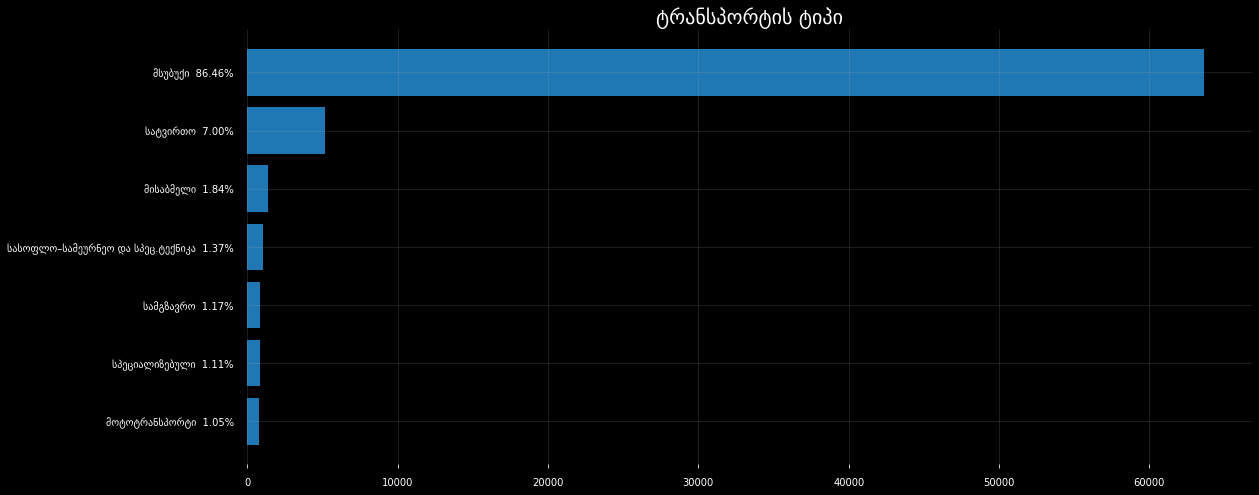

In [11]:
Type_of_vehicle = df["ტრანსპორტის ტიპი"]   # ვიღებთ ინფორმაციას ტრანსპორტის ტიპებზე

Type_of_vehicle_Counter = Counter(Type_of_vehicle)   # ვითვლით რამნდენჯერ მეორდება ცვლადები

Quantity_key_Phrases_all(Type_of_vehicle_Counter, False)        # ვიყენებთ ფუნქციას რათა ამოვკრიბოთ ფრაზები რომლის მიმართ უნდა ავაგოთ ნახაზი


key_Phrases  # ფრაზები რომლების ნამდვილი რაოდენობაც უნდა ვიპოვოთ 



union = {}  #ვქმნით დიქშინარის რათა შევინახოთ საბოლოო პასუხები

for item in key_Phrases:

    Quantity_of_Transport = df[ (Type_of_vehicle == item) & ( df["რაოდენობა"] != "NaN")]  # ფიღებთ საჭირო ფრაზების მიხედვით ინფორმაციას

    Quantity = Quantity_of_Transport["რაოდენობა"]  # ვინახავთ ახალ ცხვლადში რაოდენობრივ ინფორმაციას

    Quantity = sum(Quantity)        # ვითვლით კონრეტული ფრაზის ნამდვილ რაოდენობას

    union[item] = Quantity      # ნამდვილ რაოდენობას მის შესაბამის ფრაზასთან ერთად ვამატებთ პასუხების დიქშინარიში
    

Show_first(union , 7, False)  # ამ ფუქნცით ვიგებთ საერთო რაოდენობას და ვირჩევთ რამდენი ინფორმაცია გამოვიტანოთ ნახაზზე

Build_Barh_sizes_excel( key_Phrases , Quantity, Total ,"fivethirtyeight", True , (18,8), "ტრანსპორტის ტიპი")  # ვაგებთ ნახაზს

Max is  49


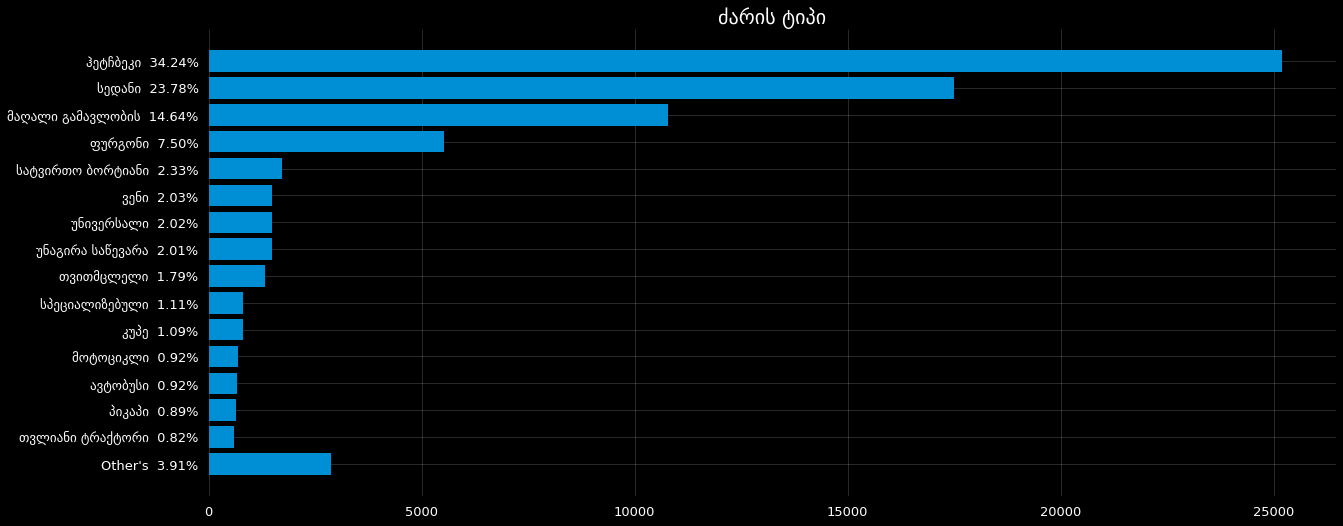

In [12]:
Type_of_vehicle = df["ძარის ტიპი"]   # ვიღებთ ინფორმაციას ძარის ტიპებზე

Type_of_vehicle_Counter = Counter(Type_of_vehicle)   # ვითვლით რამნდენჯერ მეორდება ცვლადები

Quantity_key_Phrases_all(Type_of_vehicle_Counter, False)        # ვიყენებთ ფუნქციას რათა ამოვკრიბოთ ფრაზები რომლის მიმართ უნდა ავაგოთ ნახაზი


key_Phrases  # ფრაზები რომლების ნამდვილი რაოდენობაც უნდა ვიპოვოთ 



union = {}  #ვქმნით დიქშინარის რათა შევინახოთ საბოლოო პასუხები

for item in key_Phrases:

    Quantity_of_Transport = df[ (Type_of_vehicle == item) & ( df["რაოდენობა"] != "NaN")]  # ფიღებთ საჭირო ფრაზების მიხედვით ინფორმაციას

    Quantity = Quantity_of_Transport["რაოდენობა"]  # ვინახავთ ახალ ცხვლადში რაოდენობრივ ინფორმაციას

    Quantity = sum(Quantity)        # ვითვლით კონრეტული ფრაზის ნამდვილ რაოდენობას

    union[item] = Quantity      # ნამდვილ რაოდენობას მის შესაბამის ფრაზასთან ერთად ვამატებთ პასუხების დიქშინარიში
    

Show_first(union , 15, True)  # ამ ფუქნცით ვიგებთ საერთო რაოდენობას და ვირჩევთ რამდენი ინფორმაცია გამოვიტანოთ ნახაზზე

Build_Barh_sizes_excel( key_Phrases , Quantity, Total ,"fivethirtyeight", True , (18,8), "ძარის ტიპი")  # ვაგებთ ნახაზს

Max is  513


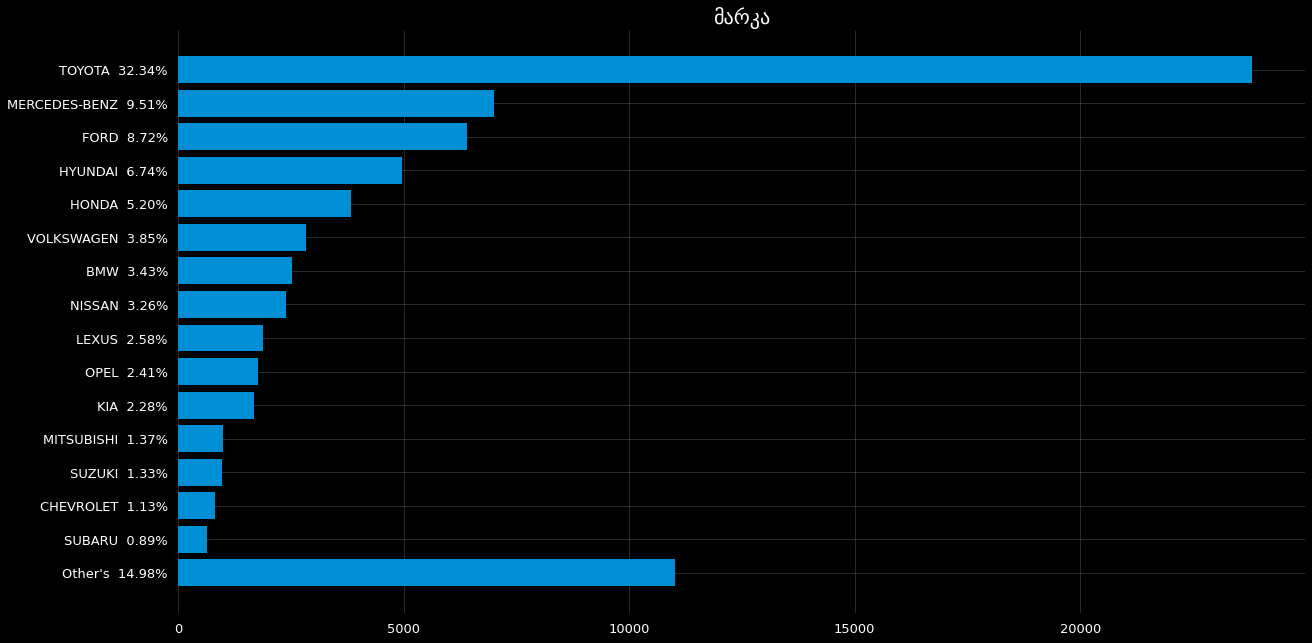

In [13]:
Type_of_vehicle = df["მარკა"]   # ვიღებთ ინფორმაციას მარკა ტიპებზე

Type_of_vehicle_Counter = Counter(Type_of_vehicle)   # ვითვლით რამნდენჯერ მეორდება ცვლადები

Quantity_key_Phrases_all(Type_of_vehicle_Counter, False)        # ვიყენებთ ფუნქციას რათა ამოვკრიბოთ ფრაზები რომლის მიმართ უნდა ავაგოთ ნახაზი


key_Phrases  # ფრაზები რომლების ნამდვილი რაოდენობაც უნდა ვიპოვოთ 



union = {}  #ვქმნით დიქშინარის რათა შევინახოთ საბოლოო პასუხები

for item in key_Phrases:

    Quantity_of_Transport = df[ (Type_of_vehicle == item) & ( df["რაოდენობა"] != "NaN")]  # ფიღებთ საჭირო ფრაზების მიხედვით ინფორმაციას

    Quantity = Quantity_of_Transport["რაოდენობა"]  # ვინახავთ ახალ ცხვლადში რაოდენობრივ ინფორმაციას

    Quantity = sum(Quantity)        # ვითვლით კონრეტული ფრაზის ნამდვილ რაოდენობას

    union[item] = Quantity      # ნამდვილ რაოდენობას მის შესაბამის ფრაზასთან ერთად ვამატებთ პასუხების დიქშინარიში
    

Show_first(union , 15, True)  # ამ ფუქნცით ვიგებთ საერთო რაოდენობას და ვირჩევთ რამდენი ინფორმაცია გამოვიტანოთ ნახაზზე

Build_Barh_sizes_excel( key_Phrases , Quantity, Total ,"fivethirtyeight", True , (18,10), "მარკა")  # ვაგებთ ნახაზს

Max is  4357


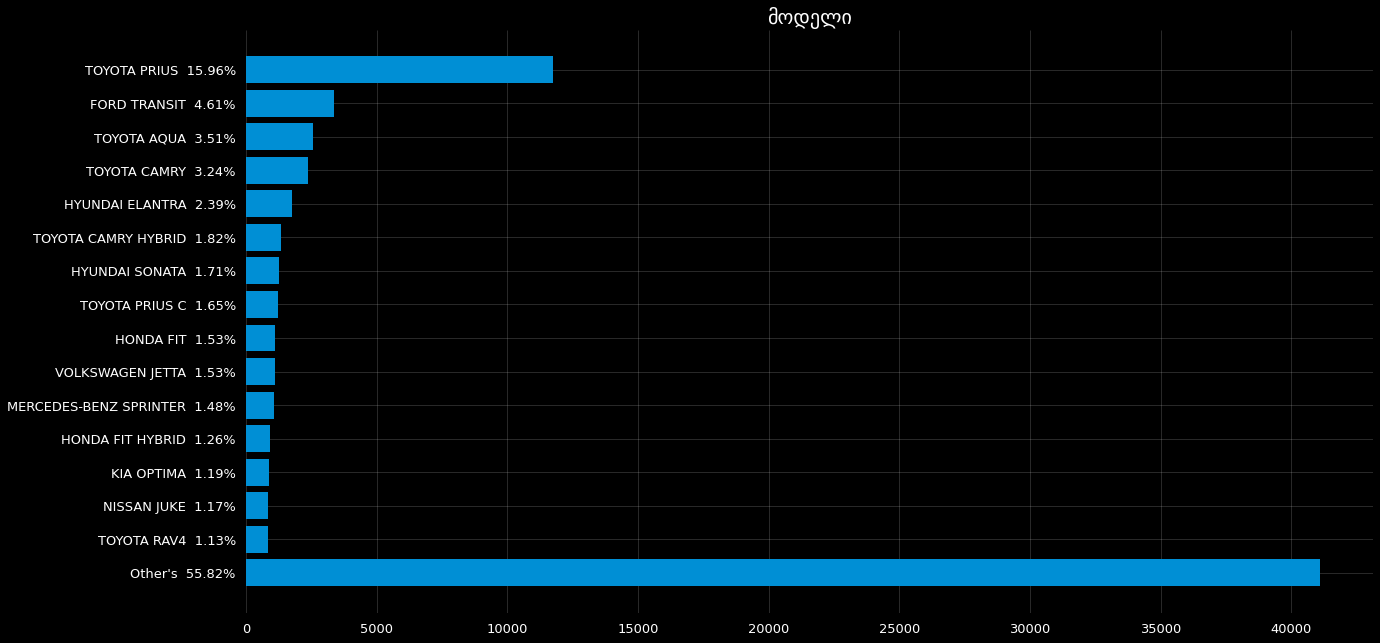

In [14]:
Type_of_vehicle = df["მოდელი"]   # ვიღებთ ინფორმაციას მოდელის ტიპებზე

Type_of_vehicle_Counter = Counter(Type_of_vehicle)   # ვითვლით რამნდენჯერ მეორდება ცვლადები

Quantity_key_Phrases_all(Type_of_vehicle_Counter, False)        # ვიყენებთ ფუნქციას რათა ამოვკრიბოთ ფრაზები რომლის მიმართ უნდა ავაგოთ ნახაზი


key_Phrases  # ფრაზები რომლების ნამდვილი რაოდენობაც უნდა ვიპოვოთ 



union = {}  #ვქმნით დიქშინარის რათა შევინახოთ საბოლოო პასუხები

for item in key_Phrases:

    Quantity_of_Transport = df[ (Type_of_vehicle == item) & ( df["რაოდენობა"] != "NaN")]  # ფიღებთ საჭირო ფრაზების მიხედვით ინფორმაციას

    Quantity = Quantity_of_Transport["რაოდენობა"]  # ვინახავთ ახალ ცხვლადში რაოდენობრივ ინფორმაციას

    Quantity = sum(Quantity)        # ვითვლით კონრეტული ფრაზის ნამდვილ რაოდენობას

    union[item] = Quantity      # ნამდვილ რაოდენობას მის შესაბამის ფრაზასთან ერთად ვამატებთ პასუხების დიქშინარიში
    

Show_first(union , 15, True)  # ამ ფუქნცით ვიგებთ საერთო რაოდენობას და ვირჩევთ რამდენი ინფორმაცია გამოვიტანოთ ნახაზზე

Build_Barh_sizes_excel( key_Phrases , Quantity, Total ,"fivethirtyeight", True , (18,10), "მოდელი")  # ვაგებთ ნახაზს


Max is  58


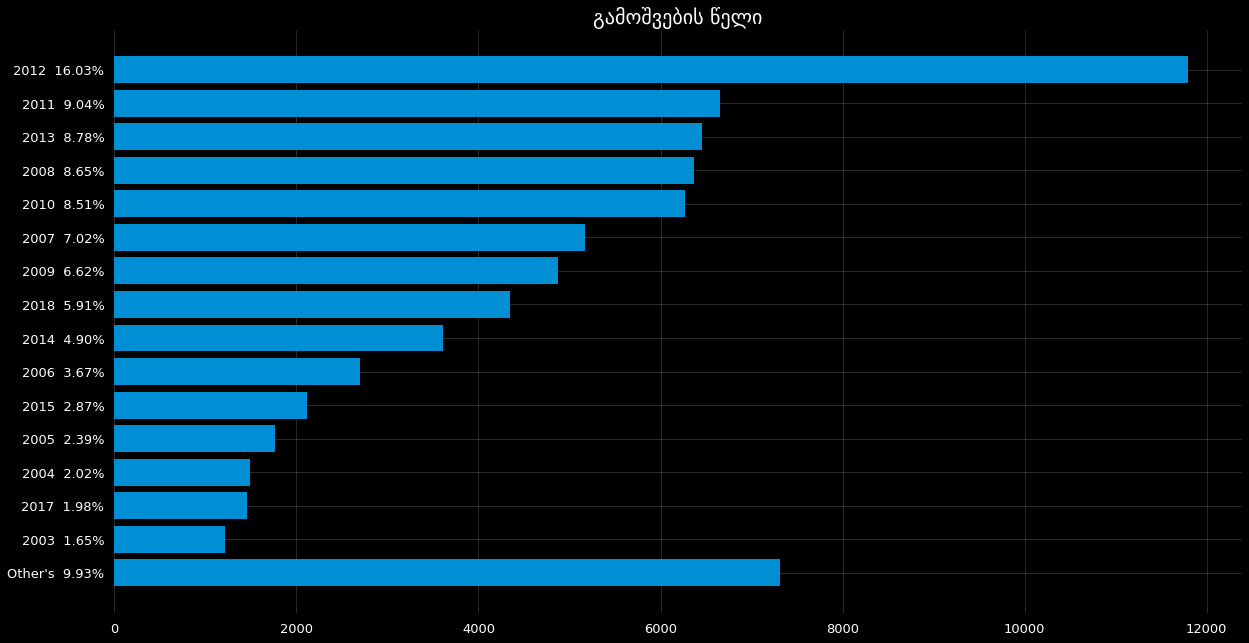

In [15]:
Type_of_vehicle = df["გამოშვების წელი"]   # ვიღებთ ინფორმაციას გამოშვების წელის მიხედვით

Type_of_vehicle_Counter = Counter(Type_of_vehicle)   # ვითვლით რამნდენჯერ მეორდება ცვლადები

Quantity_key_Phrases_all(Type_of_vehicle_Counter, False)        # ვიყენებთ ფუნქციას რათა ამოვკრიბოთ ფრაზები რომლის მიმართ უნდა ავაგოთ ნახაზი


key_Phrases  # ფრაზები რომლების ნამდვილი რაოდენობაც უნდა ვიპოვოთ 



union = {}  #ვქმნით დიქშინარის რათა შევინახოთ საბოლოო პასუხები

for item in key_Phrases:

    Quantity_of_Transport = df[ (Type_of_vehicle == item) & ( df["რაოდენობა"] != "NaN")]  # ფიღებთ საჭირო ფრაზების მიხედვით ინფორმაციას

    Quantity = Quantity_of_Transport["რაოდენობა"]  # ვინახავთ ახალ ცხვლადში რაოდენობრივ ინფორმაციას

    Quantity = sum(Quantity)        # ვითვლით კონრეტული ფრაზის ნამდვილ რაოდენობას

    union[item] = Quantity      # ნამდვილ რაოდენობას მის შესაბამის ფრაზასთან ერთად ვამატებთ პასუხების დიქშინარიში
    

Show_first(union , 15, True)  # ამ ფუქნცით ვიგებთ საერთო რაოდენობას და ვირჩევთ რამდენი ინფორმაცია გამოვიტანოთ ნახაზზე

key_Phraseso = []    # ვქმნით ახალ სიას, რათა რიხცვები int-ბის მაგივრად შევინახოთ str-ბად  რათა არ დავაეროროთ კოდი

for i in key_Phrases:
    key_Phraseso.append(str(i))   # ვინახავთ სტრინგებში და ვუშვებთ ლისთში

Build_Barh_sizes_excel( key_Phraseso , Quantity, Total ,"fivethirtyeight", True , (18,10), "გამოშვების წელი")  # ვაგებთ ნახაზს


Max is  67


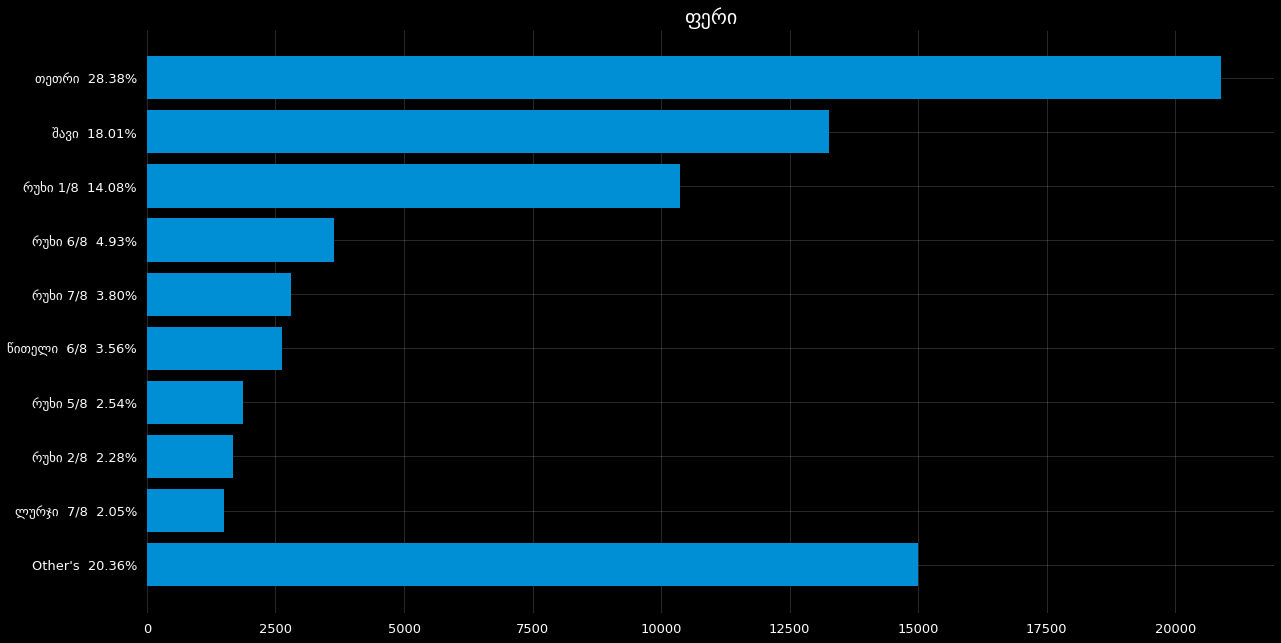

In [16]:
Type_of_vehicle = df["ფერი"]   # ვიღებთ ინფორმაციას ფერის ტიპებზე

Type_of_vehicle_Counter = Counter(Type_of_vehicle)   # ვითვლით რამნდენჯერ მეორდება ცვლადები

Quantity_key_Phrases_all(Type_of_vehicle_Counter, False)        # ვიყენებთ ფუნქციას რათა ამოვკრიბოთ ფრაზები რომლის მიმართ უნდა ავაგოთ ნახაზი


key_Phrases  # ფრაზები რომლების ნამდვილი რაოდენობაც უნდა ვიპოვოთ 



union = {}  #ვქმნით დიქშინარის რათა შევინახოთ საბოლოო პასუხები

for item in key_Phrases:

    Quantity_of_Transport = df[ (Type_of_vehicle == item) & ( df["რაოდენობა"] != "NaN")]  # ფიღებთ საჭირო ფრაზების მიხედვით ინფორმაციას

    Quantity = Quantity_of_Transport["რაოდენობა"]  # ვინახავთ ახალ ცხვლადში რაოდენობრივ ინფორმაციას

    Quantity = sum(Quantity)        # ვითვლით კონრეტული ფრაზის ნამდვილ რაოდენობას

    union[item] = Quantity      # ნამდვილ რაოდენობას მის შესაბამის ფრაზასთან ერთად ვამატებთ პასუხების დიქშინარიში
    

Show_first(union , 9, True)  # ამ ფუქნცით ვიგებთ საერთო რაოდენობას და ვირჩევთ რამდენი ინფორმაცია გამოვიტანოთ ნახაზზე

Build_Barh_sizes_excel( key_Phrases , Quantity, Total ,"fivethirtyeight", True , (18,10), "ფერი")  # ვაგებთ ნახაზს


Max is  9


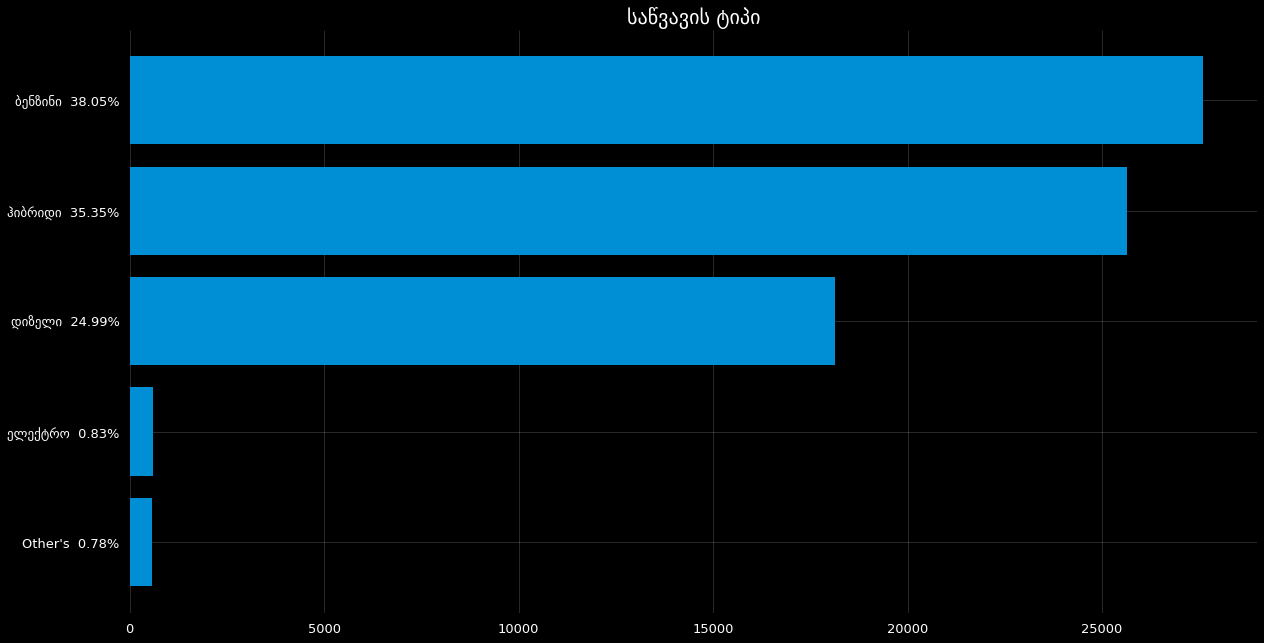

In [17]:
Type_of_vehicle = df["საწვავის ტიპი"]   # ვიღებთ ინფორმაციას საწვავის ტიპის ტიპებზე

Type_of_vehicle_Counter = Counter(Type_of_vehicle)   # ვითვლით რამნდენჯერ მეორდება ცვლადები

Quantity_key_Phrases_all(Type_of_vehicle_Counter, False)        # ვიყენებთ ფუნქციას რათა ამოვკრიბოთ ფრაზები რომლის მიმართ უნდა ავაგოთ ნახაზი


key_Phrases  # ფრაზები რომლების ნამდვილი რაოდენობაც უნდა ვიპოვოთ 



union = {}  #ვქმნით დიქშინარის რათა შევინახოთ საბოლოო პასუხები

for item in key_Phrases:

    Quantity_of_Transport = df[ (Type_of_vehicle == item) & ( df["რაოდენობა"] != "NaN")]  # ფიღებთ საჭირო ფრაზების მიხედვით ინფორმაციას

    Quantity = Quantity_of_Transport["რაოდენობა"]  # ვინახავთ ახალ ცხვლადში რაოდენობრივ ინფორმაციას

    Quantity = sum(Quantity)        # ვითვლით კონრეტული ფრაზის ნამდვილ რაოდენობას

    union[item] = Quantity      # ნამდვილ რაოდენობას მის შესაბამის ფრაზასთან ერთად ვამატებთ პასუხების დიქშინარიში
    

Show_first(union , 4, True)  # ამ ფუქნცით ვიგებთ საერთო რაოდენობას და ვირჩევთ რამდენი ინფორმაცია გამოვიტანოთ ნახაზზე

Build_Barh_sizes_excel( key_Phrases , Quantity, Total ,"fivethirtyeight", True , (18,10), "საწვავის ტიპი")  # ვაგებთ ნახაზს


Max is  1084


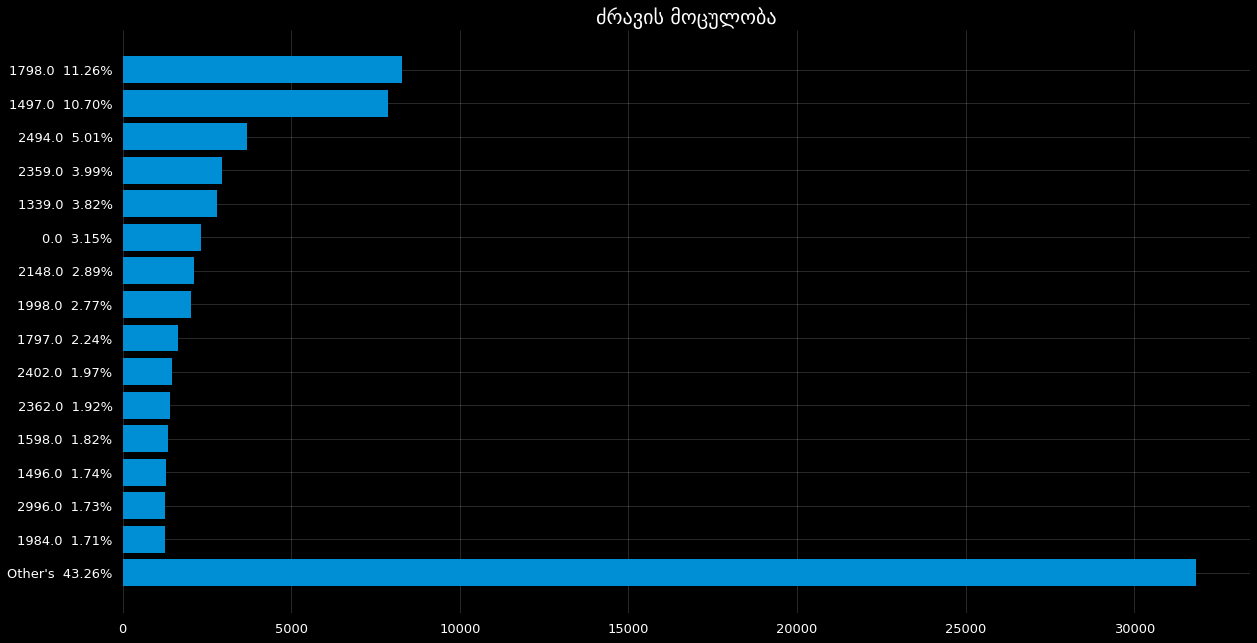

In [18]:
Type_of_vehicle = df["ძრავის მოცულობა"]   # ვიღებთ ინფორმაციას ძრავის მოცულობას მიხედვით

Type_of_vehicle_Counter = Counter(Type_of_vehicle)   # ვითვლით რამნდენჯერ მეორდება ცვლადები

Quantity_key_Phrases_all(Type_of_vehicle_Counter, False)        # ვიყენებთ ფუნქციას რათა ამოვკრიბოთ ფრაზები რომლის მიმართ უნდა ავაგოთ ნახაზი


key_Phrases  # ფრაზები რომლების ნამდვილი რაოდენობაც უნდა ვიპოვოთ 



union = {}  #ვქმნით დიქშინარის რათა შევინახოთ საბოლოო პასუხები

for item in key_Phrases:

    Quantity_of_Transport = df[ (Type_of_vehicle == item) & ( df["რაოდენობა"] != "NaN")]  # ფიღებთ საჭირო ფრაზების მიხედვით ინფორმაციას

    Quantity = Quantity_of_Transport["რაოდენობა"]  # ვინახავთ ახალ ცხვლადში რაოდენობრივ ინფორმაციას

    Quantity = sum(Quantity)        # ვითვლით კონრეტული ფრაზის ნამდვილ რაოდენობას

    union[item] = Quantity      # ნამდვილ რაოდენობას მის შესაბამის ფრაზასთან ერთად ვამატებთ პასუხების დიქშინარიში
    

Show_first(union , 15, True)  # ამ ფუქნცით ვიგებთ საერთო რაოდენობას და ვირჩევთ რამდენი ინფორმაცია გამოვიტანოთ ნახაზზე

key_Phraseso = []    # ვქმნით ახალ სიას, რათა რიხცვები int-ბის მაგივრად შევინახოთ str-ბად  რათა არ დავაეროროთ კოდი

for i in key_Phrases:
    key_Phraseso.append(str(i))   # ვინახავთ სტრინგებში და ვუშვებთ ლისთში

Build_Barh_sizes_excel( key_Phraseso , Quantity, Total ,"fivethirtyeight", True , (18,10), "ძრავის მოცულობა")  # ვაგებთ ნახაზს
